In [1]:
import pandas as pd
import numpy as np
import sys
print(sys.path)
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import f1_score, accuracy_score , recall_score , precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from numpy import argmax
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
from sklearn.metrics import confusion_matrix
import os
from tensorflow.keras import backend
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier
import math
import pickle
#from sklearn.inspection import partial_dependence

['', '/home/magupta/anaconda3/envs/stackoverflow_env/lib/python36.zip', '/home/magupta/anaconda3/envs/stackoverflow_env/lib/python3.6', '/home/magupta/anaconda3/envs/stackoverflow_env/lib/python3.6/lib-dynload', '/home/magupta/anaconda3/envs/stackoverflow_env/lib/python3.6/site-packages', '/home/magupta/anaconda3/envs/stackoverflow_env/lib/python3.6/site-packages/PDPbox-0.2.0+13.g73c6966-py3.6.egg', '/home/magupta/anaconda3/envs/stackoverflow_env/lib/python3.6/site-packages/joblib-0.15.1-py3.6.egg', '/home/magupta/anaconda3/envs/stackoverflow_env/lib/python3.6/site-packages/IPython/extensions', '/home/magupta/.ipython']


In [2]:
df_full=pd.read_csv("data_stackOverflow/final_dataframe_with_1tag_onehot.csv",index_col=0)
df_full.shape

/home/magupta/anaconda3/envs/stackoverflow_env/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(1264212, 27)

In [3]:
label_col = [col for col in df_full if col.startswith('tag_')]

In [4]:
df_full.head(2)

,ques_title,ques_body,ques_score_bad,ques_score_medium,ques_score_good,tag_.net,tag_android,tag_asp.net,tag_c,tag_c#,...,tag_jquery,tag_mysql,tag_objective-c,tag_other,tag_php,tag_python,tag_ruby-on-rails,tag_sql,maintag,all_tags
0,sqlstatement execut multipl queri one statement,i written databas generat script href http en ...,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,other,other/other/other
1,good branch merg tutori tortoisesvn,realli good tutori explain href http svnbook r...,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,other,other/other/other/other


In [5]:
df_full["maintag"].value_counts()

other            424440
javascript       118826
java             114208
c#               100192
php               92015
android           71962
python            62622
c++               45318
ios               36617
jquery            31429
ruby-on-rails     22556
html              22276
sql               22094
mysql             20254
c                 18987
iphone            17165
asp.net           13329
css               11288
objective-c       10055
.net               8546
Name: maintag, dtype: int64

In [6]:
df_full.iloc[df_full['all_tags'].values=="nan/other/other/other"].head(2)

,ques_title,ques_body,ques_score_bad,ques_score_medium,ques_score_good,tag_.net,tag_android,tag_asp.net,tag_c,tag_c#,...,tag_jquery,tag_mysql,tag_objective-c,tag_other,tag_php,tag_python,tag_ruby-on-rails,tag_sql,maintag,all_tags
33127,jsp portlet submit form valu,use liferay portal x deploy simpl portlet use ...,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,nan/other/other/other
154359,sitecor context item null postback,inherit sitecor implement tri debug membership...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,nan/other/other/other


In [7]:
c=df_full['ques_title'].apply(lambda x: len(str(x).split()))
d=df_full['ques_body'].apply(lambda x: len(str(x).split()))
c.mean(),c.max(),c.min(),d.mean(),d.max(),d.min()

(5.79542197036573, 22, 1, 136.90592954346263, 8469, 1)

In [8]:
df_full['text']=df_full['ques_title']+df_full['ques_body']
df_full.drop(['ques_title','ques_body'],inplace=True,axis=1)

In [9]:
df_full = df_full[df_full.maintag.notnull()]
df_full.shape

(1264179, 26)

In [10]:
label_encoder = LabelEncoder() 
df_full['maintag']= label_encoder.fit_transform(df_full['maintag'].astype(str)) 
df_full['maintag'].unique() 

array([15, 19,  4,  5,  0,  7,  3,  2, 16, 10, 11,  6, 14, 13, 17, 18, 12,
        1,  9,  8])

In [11]:
label_encoder.classes_

array(['.net', 'android', 'asp.net', 'c', 'c#', 'c++', 'css', 'html',
       'ios', 'iphone', 'java', 'javascript', 'jquery', 'mysql',
       'objective-c', 'other', 'php', 'python', 'ruby-on-rails', 'sql'], dtype=object)

In [12]:
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
le_name_mapping

{'.net': 0,
 'android': 1,
 'asp.net': 2,
 'c': 3,
 'c#': 4,
 'c++': 5,
 'css': 6,
 'html': 7,
 'ios': 8,
 'iphone': 9,
 'java': 10,
 'javascript': 11,
 'jquery': 12,
 'mysql': 13,
 'objective-c': 14,
 'other': 15,
 'php': 16,
 'python': 17,
 'ruby-on-rails': 18,
 'sql': 19}

In [13]:
df_full.head(2)

,ques_score_bad,ques_score_medium,ques_score_good,tag_.net,tag_android,tag_asp.net,tag_c,tag_c#,tag_c++,tag_css,...,tag_mysql,tag_objective-c,tag_other,tag_php,tag_python,tag_ruby-on-rails,tag_sql,maintag,all_tags,text
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,15,other/other/other,sqlstatement execut multipl queri one statemen...
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,15,other/other/other/other,good branch merg tutori tortoisesvnrealli good...


In [14]:
score_col = [col for col in df_full if col.startswith('ques_score_')]

# Applying tfidf

In [15]:
def tf_idf(df,flag,tfidf_text):
    if (flag=='train'):
        xyz = tfidf_text.fit_transform(df['text'].values.astype('U')).toarray().tolist()
    else:
        xyz = tfidf_text.transform(df['text'].values.astype('U')).toarray().tolist()
        
    return xyz

# Taking 5k samples from every class present in original dataframe

In [ ]:
sample_size=5000
df_equal_samples=pd.DataFrame(df_full.groupby('maintag').apply(lambda x: x.sample(sample_size)))

In [ ]:
equal_train, equal_val_test = train_test_split(df_equal_samples, test_size=0.2)
equal_val,equal_test=train_test_split(equal_val_test, test_size=0.5)

In [ ]:
df_equal_samples.shape,equal_train.shape,equal_val.shape,equal_test.shape

In [ ]:
equal_x_train = equal_train.drop(['all_tags','maintag'],axis=1)
equal_x_val = equal_val.drop(['all_tags','maintag'],axis=1)
equal_x_test = equal_test.drop(['all_tags','maintag'],axis=1)
equal_y_train=equal_train['maintag']
equal_y_val=equal_val['maintag']
equal_y_test=equal_test['maintag']

In [ ]:
equal_x_train.shape,equal_y_train.shape,equal_x_val.shape,equal_y_val.shape,equal_x_test.shape,equal_y_test.shape

In [ ]:
equal_x_train.columns

In [ ]:
equal_tfidf_text = TfidfVectorizer(lowercase=True,ngram_range=(1,3),max_features=300) # max_df=0.9, min_df=0.1

equal_train_tfidf = pd.DataFrame(tf_idf(equal_x_train,'train',equal_tfidf_text ))
equal_val_tfidf= pd.DataFrame(tf_idf(equal_x_val,'val',equal_tfidf_text ))
equal_test_tfidf=  pd.DataFrame(tf_idf(equal_x_test,'test',equal_tfidf_text ))

equal_train_features = pd.DataFrame(np.hstack([equal_train_tfidf, equal_x_train[score_col]]))
equal_val_features= pd.DataFrame(np.hstack([equal_val_tfidf, equal_x_val[score_col]]))
equal_test_features=  pd.DataFrame(np.hstack([equal_test_tfidf, equal_x_test[score_col]]))

In [ ]:
equal_tfidf_text.vocabulary_,len(equal_tfidf_text.vocabulary_)

In [ ]:
print(equal_train_tfidf.shape,equal_val_tfidf.shape,equal_test_tfidf.shape)
print(equal_train_features.shape,equal_val_features.shape,equal_test_features.shape)

In [ ]:
equal_text_feature_names = np.array(equal_tfidf_text.get_feature_names())

# Applying random Forest

In [ ]:
model_1 = RandomForestClassifier(n_estimators=200, oob_score='TRUE', n_jobs=-1, random_state=50, max_features="auto",min_samples_leaf=1)
model_1.fit(equal_train_features, equal_y_train)
equal_y_pred = model_1.predict(equal_test_features)

In [ ]:
print("accuracy of Random Forest:",accuracy_score(equal_y_pred,equal_y_test))

In [ ]:
conf_mat = confusion_matrix(equal_y_test, equal_y_pred)
print(conf_mat)

In [ ]:
report=classification_report(equal_y_test, equal_y_pred)
print(report)

# Taking Random 100k samples from original dataframe thus having stratified split.

In [16]:
df=df_full.sample(n=100000)
df['maintag'].value_counts()

15    33661
11     9351
10     9110
4      7937
16     7119
1      5661
17     4898
5      3578
8      2912
12     2508
18     1874
19     1735
7      1697
13     1652
3      1470
9      1410
2       995
6       896
14      833
0       703
Name: maintag, dtype: int64

In [17]:
df.to_csv("sample_data.csv")

In [18]:
train, val_test = train_test_split(df, test_size=0.2)
val,test=train_test_split(val_test, test_size=0.5)

In [19]:
df.shape,train.shape,val.shape,test.shape

((100000, 26), (80000, 26), (10000, 26), (10000, 26))

In [20]:
df.columns

Index(['ques_score_bad', 'ques_score_medium', 'ques_score_good', 'tag_.net',
       'tag_android', 'tag_asp.net', 'tag_c', 'tag_c#', 'tag_c++', 'tag_css',
       'tag_html', 'tag_ios', 'tag_iphone', 'tag_java', 'tag_javascript',
       'tag_jquery', 'tag_mysql', 'tag_objective-c', 'tag_other', 'tag_php',
       'tag_python', 'tag_ruby-on-rails', 'tag_sql', 'maintag', 'all_tags',
       'text'],
      dtype='object')

In [21]:
x_train = train.drop(label_col+['all_tags','maintag'],axis=1)
x_val = val.drop(label_col+['all_tags','maintag'],axis=1)
x_test = test.drop(label_col+['all_tags','maintag'],axis=1)
y_train_onehot = train[label_col]
y_test_onehot = test[label_col]
y_val_onehot = val[label_col]
y_train=train['maintag']
y_val=val['maintag']
y_test=test['maintag']

In [22]:
x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape,y_val_onehot.shape

((80000, 4), (80000,), (10000, 4), (10000,), (10000, 4), (10000,), (10000, 20))

In [23]:
tfidf_text = TfidfVectorizer(lowercase=True,ngram_range=(1,3),max_features=500) # max_df=0.9, min_df=0.1

train_tfidf = pd.DataFrame(tf_idf(x_train,'train',tfidf_text))
val_tfidf= pd.DataFrame(tf_idf(x_val,'val',tfidf_text))
test_tfidf=  pd.DataFrame(tf_idf(x_test,'test',tfidf_text))

train_features = pd.DataFrame(np.hstack([train_tfidf, x_train[score_col]]))
val_features= pd.DataFrame(np.hstack([val_tfidf, x_val[score_col]]))
test_features=  pd.DataFrame(np.hstack([test_tfidf, x_test[score_col]]))

In [24]:
tfidf_text.vocabulary_,len(tfidf_text.vocabulary_)

({'abl': 0,
  'access': 1,
  'action': 2,
  'activ': 3,
  'ad': 4,
  'add': 5,
  'address': 6,
  'advanc': 7,
  'ajax': 8,
  'allow': 9,
  'alreadi': 10,
  'also': 11,
  'alt': 12,
  'amp': 13,
  'amp amp': 14,
  'android': 15,
  'android layout': 16,
  'anim': 17,
  'anoth': 18,
  'answer': 19,
  'anyon': 20,
  'apach': 21,
  'api': 22,
  'app': 23,
  'append': 24,
  'applic': 25,
  'appreci': 26,
  'arg': 27,
  'array': 28,
  'asp': 29,
  'attribut': 30,
  'auto': 31,
  'back': 32,
  'background': 33,
  'bar': 34,
  'base': 35,
  'bind': 36,
  'bit': 37,
  'block': 38,
  'blockquot': 39,
  'bodi': 40,
  'border': 41,
  'box': 42,
  'br': 43,
  'br gt': 44,
  'break': 45,
  'browser': 46,
  'build': 47,
  'button': 48,
  'byte': 49,
  'call': 50,
  'cannot': 51,
  'case': 52,
  'catch': 53,
  'categori': 54,
  'cell': 55,
  'center': 56,
  'chang': 57,
  'char': 58,
  'check': 59,
  'class': 60,
  'click': 61,
  'client': 62,
  'close': 63,
  'code': 64,
  'code code': 65,
  'code lt'

In [25]:
print(train_tfidf.shape,val_tfidf.shape,test_tfidf.shape)
print(train_features.shape,val_features.shape,test_features.shape)

(80000, 500) (10000, 500) (10000, 500)
(80000, 503) (10000, 503) (10000, 503)


In [26]:
text_feature_names = np.array(tfidf_text.get_feature_names())

In [27]:
model_2 = RandomForestClassifier(n_estimators=100, oob_score='TRUE', n_jobs=-1, random_state=50, max_features="auto",min_samples_leaf=1)
model_2.fit(train_features, y_train)
y_pred = model_2.predict(test_features)

In [28]:
print("accuracy of Random Forest:",accuracy_score(y_pred,y_test))

accuracy of Random Forest: 0.6022


In [29]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[   3    0    1    0   12    0    0    1    0    0    3    2    0    0
     0   61    0    1    0    0]
 [   0  422    0    0    7    0    0    2    0    0   29    4    0    0
     0   91    4    2    0    0]
 [   0    0   14    0   20    0    0    0    0    0    2    7    1    0
     0   59    0    0    0    1]
 [   0    0    0   56    2    9    0    0    0    0    1    0    0    0
     0   67    0    2    0    0]
 [   0    7   14    0  328    6    0    1    4    0   20   19    0    3
     0  422    6    2    0    1]
 [   0    0    0   19    5  185    0    0    1    0    7    0    0    0
     0  156    0    2    0    0]
 [   0    1    0    0    0    0   20   30    0    0    1   12    0    0
     0   36    0    0    0    0]
 [   0    2    0    0    0    0   16   62    0    0    1   19    2    0
     0   63    8    0    0    0]
 [   0    1    0    1    0    0    1    1  142    2    0    0    0    0
     1  135    1    1    0    0]
 [   0    0    0    0    1    0    1    0   33    1    

In [30]:
report=classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

          0       1.00      0.04      0.07        84
          1       0.76      0.75      0.75       561
          2       0.41      0.13      0.20       104
          3       0.68      0.41      0.51       137
          4       0.64      0.39      0.49       833
          5       0.83      0.49      0.62       375
          6       0.44      0.20      0.28       100
          7       0.52      0.36      0.42       173
          8       0.57      0.50      0.53       286
          9       0.33      0.01      0.01       131
         10       0.70      0.58      0.64       877
         11       0.60      0.64      0.62       976
         12       0.50      0.23      0.32       249
         13       0.65      0.53      0.58       153
         14       0.33      0.01      0.02        94
         15       0.54      0.78      0.64      3388
         16       0.69      0.68      0.69       672
         17       0.76      0.66      0.71   

In [32]:
data = np.array(train_features.values)

In [34]:
y_train_onehot.shape,train_features.shape,y_train.shape

((80000, 20), (80000, 503), (80000,))

In [35]:
train_features=train_features.reset_index()
y_train_onehot=y_train_onehot.reset_index()
y_train=y_train.reset_index()
test_features=test_features.reset_index()
y_test_onehot=y_test_onehot.reset_index()
y_test=y_test.reset_index()

In [38]:
dataframe_train=pd.concat([train_features,y_train_onehot,y_train], axis=1)#,ignore_index=False)
dataframe_test=pd.concat([test_features,y_test_onehot,y_test], axis=1)

In [44]:
dataframe_train.drop(['index'],axis=1,inplace=True)
dataframe_test.drop(['index'],axis=1,inplace=True)

In [45]:
dataframe_test

,0,1,2,3,4,5,6,7,8,9,...,tag_javascript,tag_jquery,tag_mysql,tag_objective-c,tag_other,tag_php,tag_python,tag_ruby-on-rails,tag_sql,maintag
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,5
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,19
2,0.000000,0.137815,0.042591,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,1,0,18
3,0.000000,0.141130,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,16
4,0.000000,0.051493,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,17
5,0.000000,0.034567,0.024927,0.076951,0.000000,0.009470,0.00000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,10
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,10
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.041628,0.000000,...,0,1,0,0,0,0,0,0,0,12
8,0.000000,0.094034,0.000000,0.209328,0.137100,0.000000,0.00000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,4
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,15


In [46]:
dataframe_train.to_csv("dataframe_train.csv")
dataframe_test.to_csv("dataframe_test.csv")

# Feature importance

Text(0.5,0,'Relative Importance')

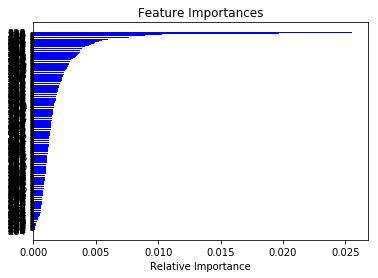

In [47]:
importances = model_2.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), train_features[indices])
plt.xlabel('Relative Importance')

In [48]:
importances={k: v for v, k in enumerate(importances)}
importances = dict([(value, key) for key, value in importances.items()]) 

In [49]:
importances

{0: 0.0016639680899449638,
 1: 0.0015120000585842805,
 2: 0.0012894995521594605,
 3: 0.0026852919699720005,
 4: 0.0016548626063931193,
 5: 0.0029281737033826083,
 6: 0.00084279070807753318,
 7: 0.0014534045952804238,
 8: 0.0011264438568333167,
 9: 0.0010395652644552417,
 10: 0.0010997272545887453,
 11: 0.0024961441740932958,
 12: 0.00073473509410969565,
 13: 0.0023287845917433852,
 14: 0.00058595415233458849,
 15: 0.0251754016533942,
 16: 0.00092093336113303599,
 17: 0.0010994829081962716,
 18: 0.0019414640662928809,
 19: 0.00097752747523544362,
 20: 0.0017889448192915181,
 21: 0.0006199596144001847,
 22: 0.0013448908728097306,
 23: 0.0045480113814589662,
 24: 0.00086326580890467393,
 25: 0.0032091621927852177,
 26: 0.0014392979090812547,
 27: 0.00103590281484357,
 28: 0.0038410074301951651,
 29: 0.0030451396700751352,
 30: 0.00092876092181984576,
 31: 0.00082309339668322208,
 32: 0.0012346379690426927,
 33: 0.0015761591780343439,
 34: 0.00074492044994163033,
 35: 0.0017678707219190434

In [50]:
text_dictn=tfidf_text.vocabulary_
feature_dict=dict([(value, key) for key, value in text_dictn.items()]) 

In [51]:
def mergeDict(dict1, dict2):
   ''' Merge dictionaries and keep values of common keys in list'''
   dict3 = {**dict1, **dict2}
   for key, value in dict3.items():
       if key in dict1 and key in dict2:
               dict3[key] = [value , dict1[key]]
 
   return dict3

In [52]:
final_dict=mergeDict(importances, feature_dict)
final_dict

{0: ['abl', 0.0016639680899449638],
 1: ['access', 0.0015120000585842805],
 2: ['action', 0.0012894995521594605],
 3: ['activ', 0.0026852919699720005],
 4: ['ad', 0.0016548626063931193],
 5: ['add', 0.0029281737033826083],
 6: ['address', 0.00084279070807753318],
 7: ['advanc', 0.0014534045952804238],
 8: ['ajax', 0.0011264438568333167],
 9: ['allow', 0.0010395652644552417],
 10: ['alreadi', 0.0010997272545887453],
 11: ['also', 0.0024961441740932958],
 12: ['alt', 0.00073473509410969565],
 13: ['amp', 0.0023287845917433852],
 14: ['amp amp', 0.00058595415233458849],
 15: ['android', 0.0251754016533942],
 16: ['android layout', 0.00092093336113303599],
 17: ['anim', 0.0010994829081962716],
 18: ['anoth', 0.0019414640662928809],
 19: ['answer', 0.00097752747523544362],
 20: ['anyon', 0.0017889448192915181],
 21: ['apach', 0.0006199596144001847],
 22: ['api', 0.0013448908728097306],
 23: ['app', 0.0045480113814589662],
 24: ['append', 0.00086326580890467393],
 25: ['applic', 0.0032091621

In [53]:
rem_list = [500, 501, 502] 
res = dict([(key, val) for key, val in 
           final_dict.items() if key not in rem_list]) 

In [54]:
listofTuples = sorted(res.items() , reverse=True, key=lambda x: x[1][1])

In [58]:
listofTuples

[(335, ['php', 0.025541244366672034]),
 (15, ['android', 0.0251754016533942]),
 (228, ['java', 0.022328838925643763]),
 (364, ['python', 0.019716219122454109]),
 (230, ['javascript', 0.01366245439274515]),
 (232, ['jqueri', 0.010289439672291208]),
 (64, ['code', 0.010217482635865964]),
 (479, ['var', 0.0091607443963287443]),
 (159, ['function', 0.0089365318453914072]),
 (300, ['mysql', 0.0087370002888414438]),
 (344, ['pre', 0.0082084696085079987]),
 (471, ['use', 0.0080702194655320955]),
 (67, ['code pre', 0.0077913195874127848]),
 (345, ['pre code', 0.0076904955376585612]),
 (221, ['int', 0.0072071113894169236]),
 (483, ['void', 0.0064411649294016408]),
 (304, ['new', 0.0063518036176710355]),
 (168, ['gt', 0.0062244404261913343]),
 (162, ['get', 0.0059664085033639932]),
 (426, ['std', 0.0059588532974464729]),
 (358, ['public', 0.0058656351187240394]),
 (60, ['class', 0.0054863953695037668]),
 (264, ['lt', 0.005386504600267834]),
 (429, ['string', 0.0052552214525399274]),
 (250, ['lik

In [59]:
with open("feature_importance.txt", "wb") as fp:   #Pickling
    pickle.dump(listofTuples, fp)

In [56]:
pickle.dump(model_2, open('RF_model', 'wb'))

# Applying Xgboost on the dataset.

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
eval_set = [(train_features, y_train),(val_features, y_val)]
model_3 = XGBClassifier(learning_rate =0.1,n_estimators=100, max_depth=3,nthread=4,seed=27,objective="multi:softmax",num_class=20)

In [ ]:
# n_estimators = range(50, 400, 50)
# param_grid = dict(n_estimators=n_estimators)
# kfold = StratifiedKFold(n_splits scoring="neg_log_loss", n_jobs=-1, cv=kfold)
# result = grid_search.fit(X, label_encoded_y)

In [ ]:
model_3.fit(train_features,y_train, eval_set=eval_set)
y_pred = model_3.predict(test_features)

In [ ]:
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
eli5.explain_prediction_df(model_3,train_features.iloc[[20]],top_targets=2)